# Mobile Price (Project)

# Classification (Project)

# Test Data Cleaning part

# Step 1: Business Problem Understanding

**Classify Mobile Price Range**

### Context

.Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

.He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

.Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

.In this problem, you do not have to predict the actual price but a price range indicating how high the price is ?

### We have to Predict Mobile Price range

# Step 2: Data Understanding

. Understand every variable

. Data Exploration

. EDA

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"C:\Users\abhis\Downloads\test (1).csv")
df.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [4]:
df.columns

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [5]:
df.drop(columns=['id'],inplace=True)

In [6]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0
996,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0


### battery_power
**The total energy a battery can store in one time measured in mAh**

In [7]:
df['battery_power'].describe() # continous

count    1000.000000
mean     1248.510000
std       432.458227
min       500.000000
25%       895.000000
50%      1246.500000
75%      1629.250000
max      1999.000000
Name: battery_power, dtype: float64

### blue
**Has Bluetooth or not**

In [8]:
df[ 'blue'].unique()    # discrete_count

array([1, 0], dtype=int64)

In [9]:
df[ 'blue'].value_counts()

blue
1    516
0    484
Name: count, dtype: int64

### clock_speed
**speed at which the microprocessor executes instructions**

In [10]:
df['clock_speed'].describe() # continous

count    1000.000000
mean        1.540900
std         0.829268
min         0.500000
25%         0.700000
50%         1.500000
75%         2.300000
max         3.000000
Name: clock_speed, dtype: float64

###  dual_sim
**Has dual sim support or not**

In [11]:
df[ 'dual_sim'].unique()  # discrete_count

array([1, 0], dtype=int64)

In [12]:
df[ 'dual_sim'].value_counts()

dual_sim
1    517
0    483
Name: count, dtype: int64

### FC
**Front Camera megapixels**

In [13]:
df[ 'fc'].value_counts()    # dicrete_count

fc
0     210
1     124
2      97
4      80
5      74
3      70
6      59
7      50
9      41
8      38
10     37
11     29
13     21
12     17
14     16
15     12
16     11
18     10
17      2
19      2
Name: count, dtype: int64

In [14]:
df[ 'fc'].unique()

array([14,  4,  1, 18, 11,  5,  0,  9,  2,  8,  7, 16,  6, 15, 10,  3, 12,
       13, 17, 19], dtype=int64)

### four_g
**Has 4G or not**

In [15]:
df['four_g'].value_counts() # discrete_cont

four_g
0    513
1    487
Name: count, dtype: int64

In [16]:
df['four_g'].unique()

array([0, 1], dtype=int64)

### int_memory
**Internal Memory in Gigabytes**

In [17]:
df[ 'int_memory'].describe() # Continuous

count    1000.000000
mean       33.652000
std        18.128694
min         2.000000
25%        18.000000
50%        34.500000
75%        49.000000
max        64.000000
Name: int_memory, dtype: float64

### m_dep
**Mobile Depth in cm**

In [18]:
df['m_dep'].describe() # continuous

count    1000.000000
mean        0.517500
std         0.280861
min         0.100000
25%         0.300000
50%         0.500000
75%         0.800000
max         1.000000
Name: m_dep, dtype: float64

### mobile_wt
**Weight of mobile phone**

In [19]:
df['mobile_wt'].describe() # Continuous

count    1000.00000
mean      139.51100
std        34.85155
min        80.00000
25%       109.75000
50%       139.00000
75%       170.00000
max       200.00000
Name: mobile_wt, dtype: float64

### n_cores
**Number of cores of processor**

In [20]:
df['n_cores'].value_counts() # discrete_count

n_cores
4    142
1    138
2    134
5    130
3    127
8    121
7    107
6    101
Name: count, dtype: int64

In [21]:
df['n_cores'].unique()

array([3, 5, 8, 6, 2, 1, 7, 4], dtype=int64)

### pc**Primary Camera mega pixels**s

In [22]:
df[ 'pc'].describe() # Continuous

count    1000.000000
mean       10.054000
std         6.095099
min         0.000000
25%         5.000000
50%        10.000000
75%        16.000000
max        20.000000
Name: pc, dtype: float64

### px_height
**Pixel Resolution Height**

In [23]:
df['px_height'].describe() # Continuous

count    1000.000000
mean      627.121000
std       432.929699
min         0.000000
25%       263.750000
50%       564.500000
75%       903.000000
max      1907.000000
Name: px_height, dtype: float64

### px_width
**Pixel Resolution Width**

In [24]:
df[ 'px_width'].describe() # Continuous

count    1000.000000
mean     1239.774000
std       439.670981
min       501.000000
25%       831.750000
50%      1250.000000
75%      1637.750000
max      1998.000000
Name: px_width, dtype: float64

### ram
**Random Access Memory in Mega Bytes**

In [25]:
df['ram'].describe() # Continuous

count    1000.000000
mean     2138.998000
std      1088.092278
min       263.000000
25%      1237.250000
50%      2153.500000
75%      3065.500000
max      3989.000000
Name: ram, dtype: float64

### sc_h
**Screen Height of mobile in cm**

In [26]:
df['sc_h'].describe() # Continuous

count    1000.000000
mean       11.995000
std         4.320607
min         5.000000
25%         8.000000
50%        12.000000
75%        16.000000
max        19.000000
Name: sc_h, dtype: float64

### sc_w
**Screen Width of mobile in cm**

In [27]:
df['sc_w'].describe() # Continuous

count    1000.000000
mean        5.316000
std         4.240062
min         0.000000
25%         2.000000
50%         5.000000
75%         8.000000
max        18.000000
Name: sc_w, dtype: float64

### talk_time
**longest time that a single battery charge will last when you are**

In [28]:
df['talk_time'].describe()  # Continuous

count    1000.000000
mean       11.085000
std         5.497636
min         2.000000
25%         6.750000
50%        11.000000
75%        16.000000
max        20.000000
Name: talk_time, dtype: float64

### three_g
**Has 3G or not**

In [29]:
df['three_g'].value_counts() # discrete_count

three_g
1    756
0    244
Name: count, dtype: int64

In [30]:
df['three_g'].unique()

array([0, 1], dtype=int64)

### touch_screen
**Has touch screen or not**

In [31]:
df[ 'touch_screen'].unique() # discrete_count

array([1, 0], dtype=int64)

### wifi
**Has wifi or not**

In [32]:
df[ 'wifi'].unique() # discrete_count

array([0, 1], dtype=int64)

In [33]:
continous=['battery_power','clock_speed','int_memory','m_dep','mobile_wt','pc','px_height','ram','sc_h','sc_w','talk_time']

discrete_count=['blue','dual_sim','fc','four_g','n_cores','three_g','touch_screen','wifi']

# Exploratory Data Analysis
**For Continous Variables**

In [34]:
df[continous].describe()

,battery_power,clock_speed,int_memory,m_dep,mobile_wt,pc,px_height,ram,sc_h,sc_w,talk_time
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1248.510000,1.540900,33.652000,0.517500,139.51100,10.054000,627.121000,2138.998000,11.995000,5.316000,11.085000
std,432.458227,0.829268,18.128694,0.280861,34.85155,6.095099,432.929699,1088.092278,4.320607,4.240062,5.497636
min,500.000000,0.500000,2.000000,0.100000,80.00000,0.000000,0.000000,263.000000,5.000000,0.000000,2.000000
25%,895.000000,0.700000,18.000000,0.300000,109.75000,5.000000,263.750000,1237.250000,8.000000,2.000000,6.750000
50%,1246.500000,1.500000,34.500000,0.500000,139.00000,10.000000,564.500000,2153.500000,12.000000,5.000000,11.000000
75%,1629.250000,2.300000,49.000000,0.800000,170.00000,16.000000,903.000000,3065.500000,16.000000,8.000000,16.000000
max,1999.000000,3.000000,64.000000,1.000000,200.00000,20.000000,1907.000000,3989.000000,19.000000,18.000000,20.000000


In [35]:
df[continous].skew()

battery_power    0.038771
clock_speed      0.185938
int_memory      -0.071781
m_dep            0.014054
mobile_wt        0.007531
pc               0.004038
px_height        0.609432
ram             -0.048189
sc_h            -0.038293
sc_w             0.778163
talk_time        0.015640
dtype: float64

**Normal distrbution must be -1 to 1**

**Right skew must be positive**

**left skew always must be negative**

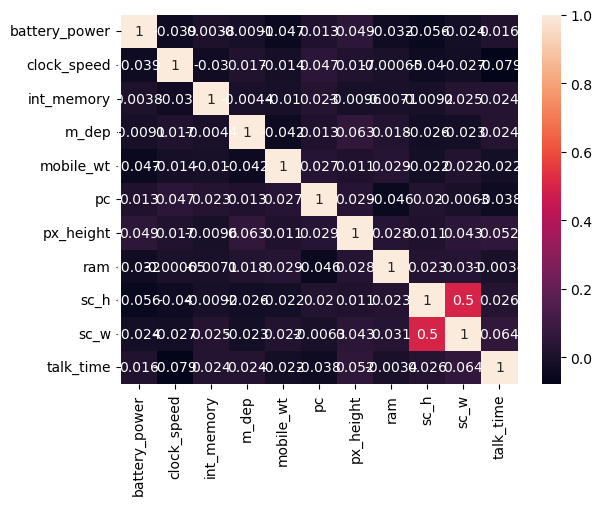

In [36]:
sns.heatmap(df[continous].corr(),annot=True)
plt.show()

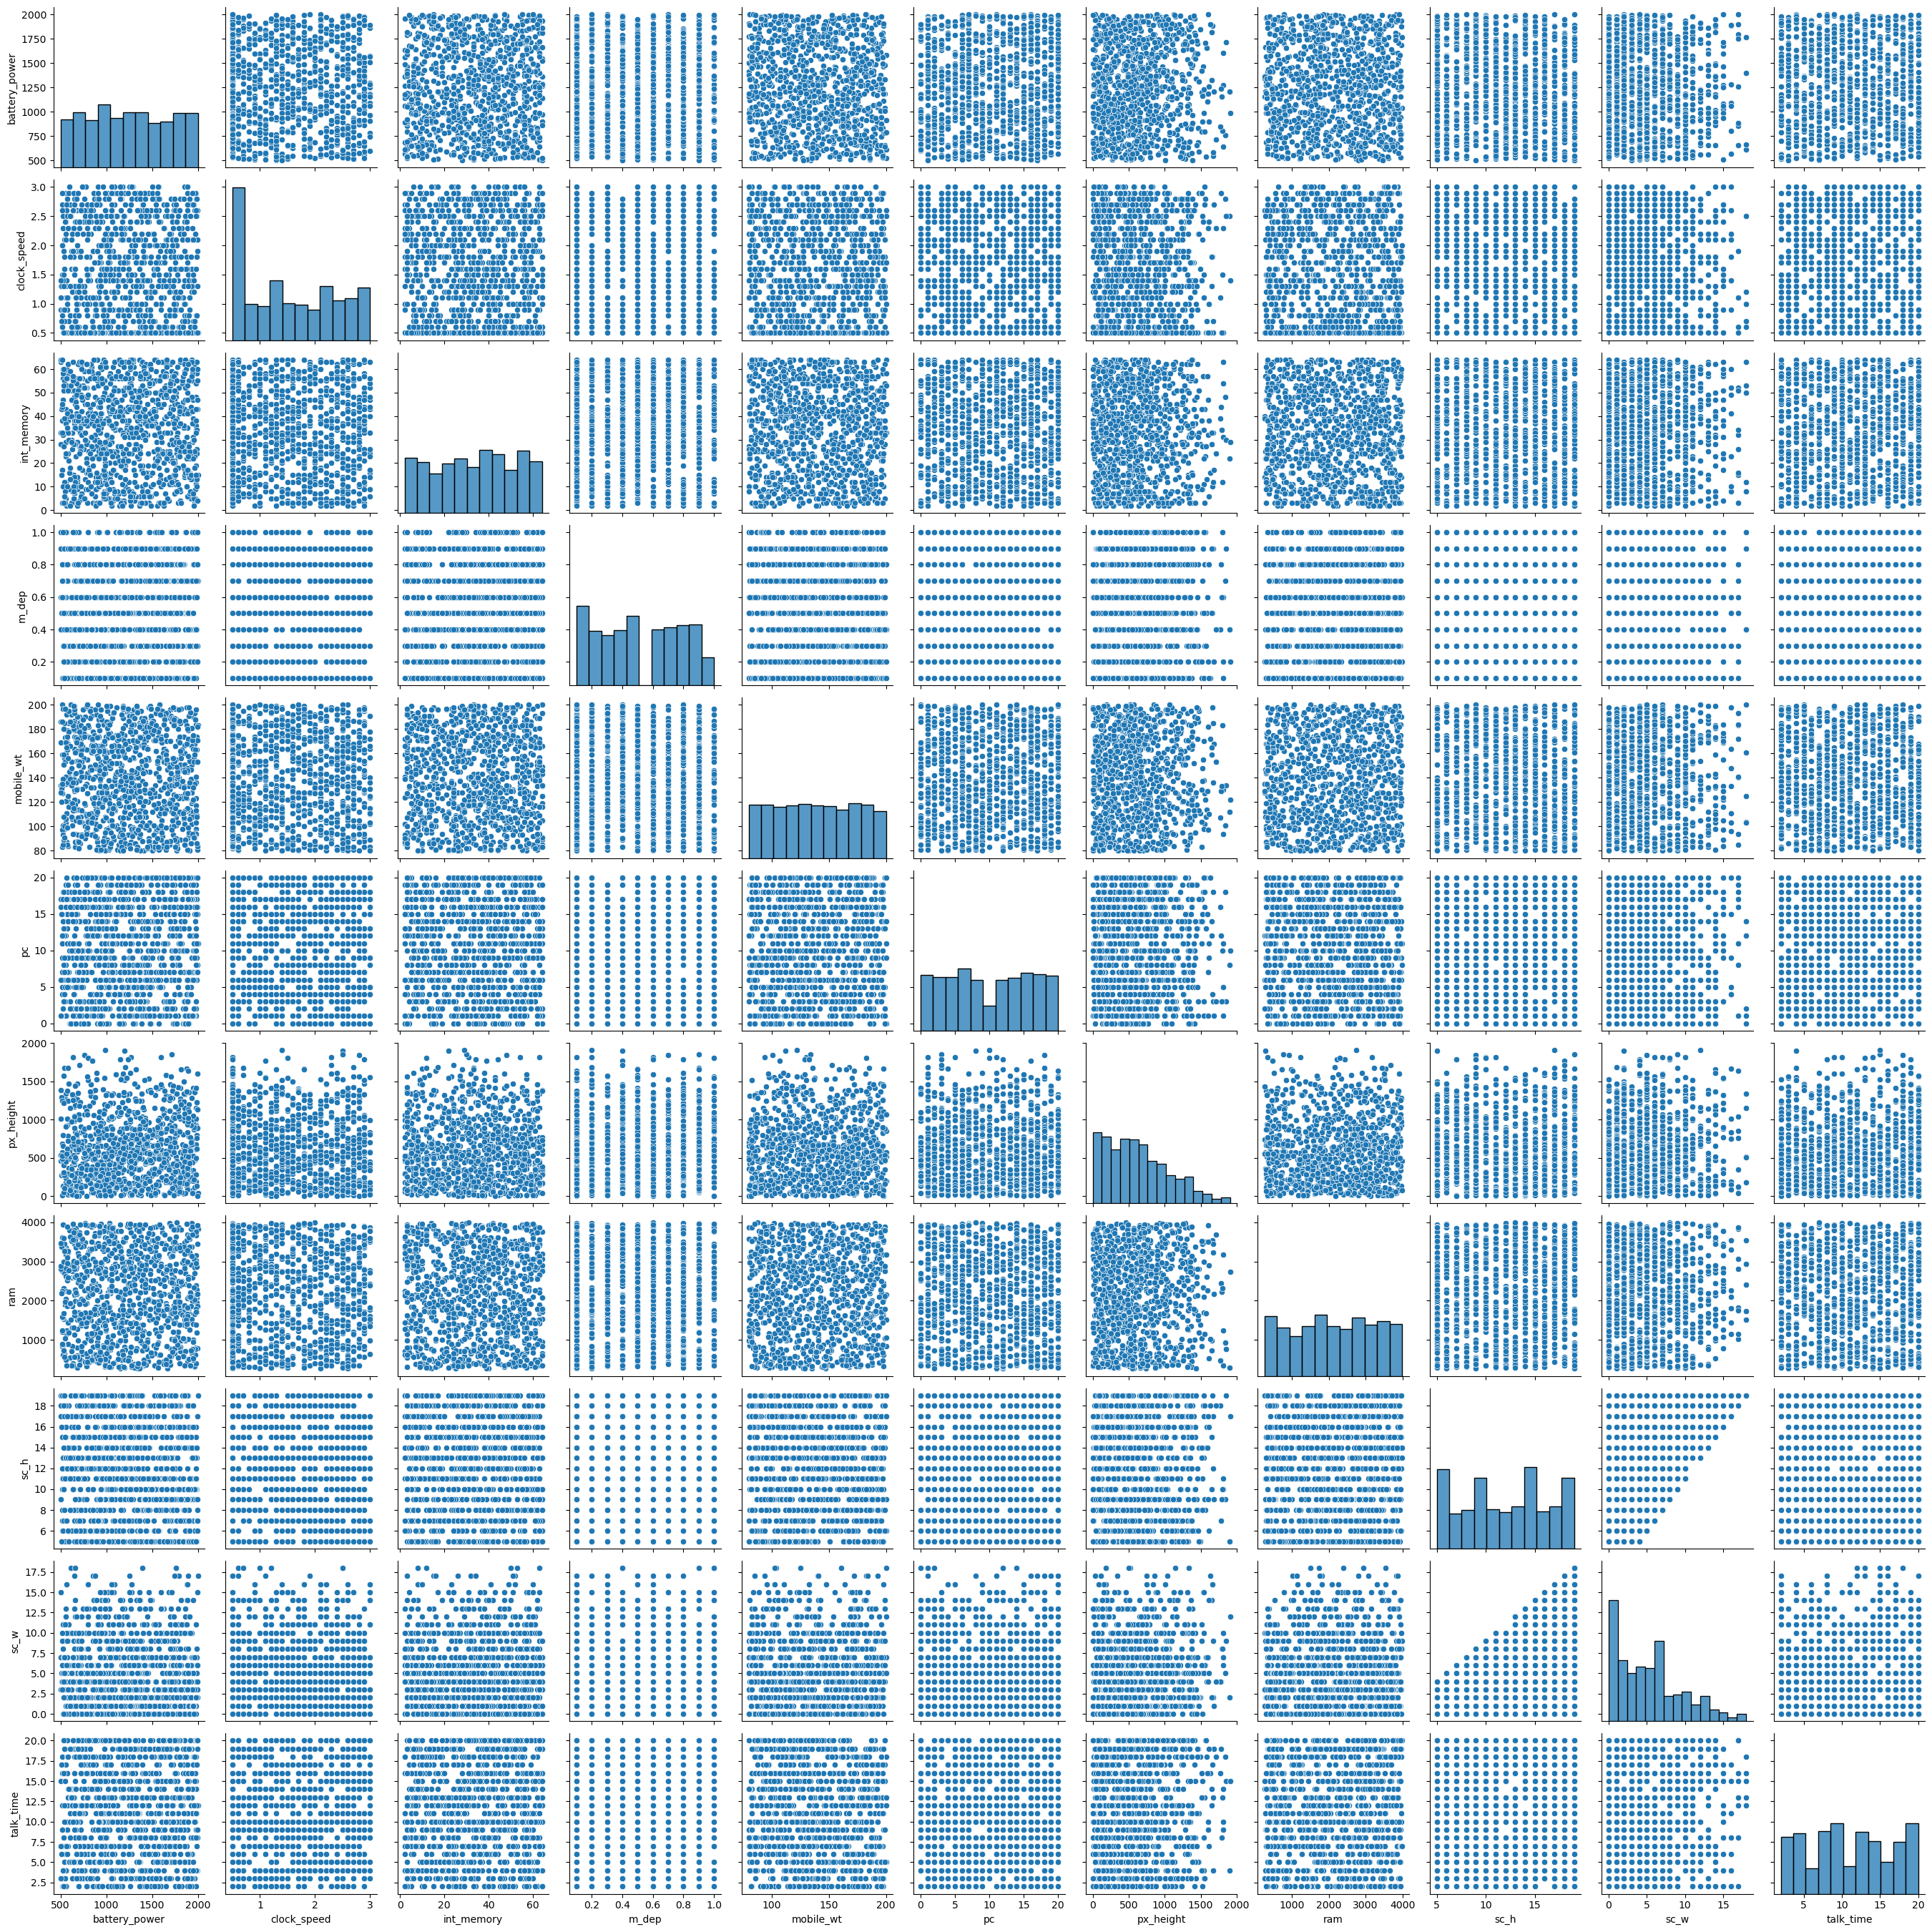

In [37]:
sns.pairplot(df[continous])
plt.show()

### Check for missing values

In [38]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

### Check for Skewness

In [39]:
df[continous].skew()

battery_power    0.038771
clock_speed      0.185938
int_memory      -0.071781
m_dep            0.014054
mobile_wt        0.007531
pc               0.004038
px_height        0.609432
ram             -0.048189
sc_h            -0.038293
sc_w             0.778163
talk_time        0.015640
dtype: float64

### check outliers

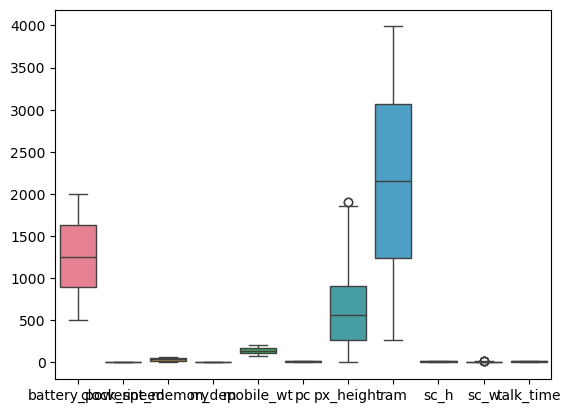

In [40]:
sns.boxplot(df[continous])
plt.show()

# Stage - 3 : Data Preparation

**1. Data Cleaning**

- Wrong data

- Missing values

- wrong data type

- duplicates

- outliers

**2. Data Wrangling**

- transformation ( applicable on continous)

- scaling (application on continous)

- encoding ( application on discrete categorical)

**Note**

. Dont apply any Data Wrangling technique on count variable

### Wrong Data treatment

In [41]:
df.duplicated().sum()

0

### Missing values Treatment

. There is no missing values

In [42]:
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
dtype: object

### Outliers Treatment

**Note**

**Outliers should be retrained**

**Encoding**

- There is no encoding here to do

In [43]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [44]:
df.to_excel("cleanedTest.xlsx")

In [45]:
pwd

'C:\\Users\\abhis\\DATA SCIENCE SUBJECT & AI\\Resume (Classification) (Project)'